In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve, ricker

In [2]:
## Define the path to where you saved your model drawing
model_img_path = "./my_model.png"

## I'm going to convert the image to grayscale, so I only have
## to worry about a single 0-255 color value for each zone rather
## than 3 channel RGB. The `.convert('L') does this grayscale conversion.
## Then we make a numpy array called `model_arr`

with Image.open(model_img_path) as img:
    img = img.convert('L')
    model_arr = np.array(img)

Model Array Shape: (100, 200)


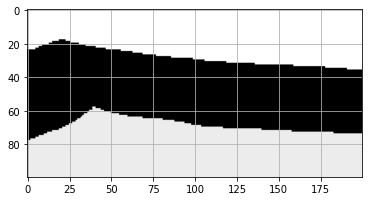

In [3]:
## To figure out the exact grayscale color value that corresponds
## to each layer, you may just want to plot the model and visually 
## identify index locations to print. 

# I like to print the array shape first as a reminder of which index
# is the X or Y axis of the plot

print(f"Model Array Shape: {model_arr.shape}")

plt.imshow(model_arr, cmap='gray')
plt.grid('both')
plt.show()

In [4]:
# Now determine the array values that correspond to each zone by
# just indexing the array at the locations you select from the 
# plotted image

zone_1_value = model_arr[10,20]
zone_2_value = model_arr[40,25]
zone_3_value = model_arr[90,50]

print(f"Zone 1 value is {zone_1_value}")
print(f"Zone 2 value is {zone_2_value}")
print(f"Zone 3 value is {zone_3_value}")

Zone 1 value is 123
Zone 2 value is 110
Zone 3 value is 122


In [5]:
## We've determined the grayscale array values that correspond
## to each of our zones. Now use `np.where` to populate new 
## density and velocity arrays

vp_arr = np.zeros(model_arr.shape)
density_arr = np.zeros(model_arr.shape)

vps = [2200, 2300, 2400]  # vp values for zones 1, 2, and 3
densities = [2550, 2600, 2650] # density values for zones

vp_arr = np.where(model_arr==zone_1_value, vps[0], vp_arr)
vp_arr = np.where(model_arr==zone_2_value, vps[1], vp_arr)
vp_arr = np.where(model_arr==zone_3_value, vps[2], vp_arr)

density_arr = np.where(model_arr==zone_1_value, vps[0], density_arr)
density_arr = np.where(model_arr==zone_2_value, vps[1], density_arr)
density_arr = np.where(model_arr==zone_3_value, vps[2], density_arr)

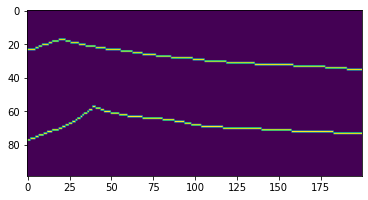

In [6]:
## Make an AI model by multiplying velocity and density arrays

AI_arr = vp_arr * density_arr

## Make a reflection coefficient model by taking derivative

RC_arr = np.diff(AI_arr, axis=0)

plt.imshow(RC_arr)

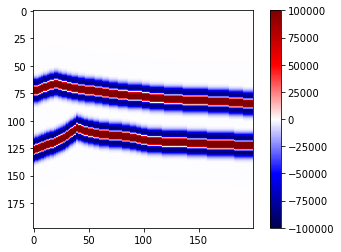

In [7]:
## Make a ricker wavelet and convolve with the RC model

wave_length = 100
wavelet = ricker(wave_length,4)

synthetic_seismic = np.zeros((RC_arr.shape[0]+wave_length-1, RC_arr.shape[1]))

for k in range(RC_arr.shape[1]):
    synthetic_seismic[:,k] = convolve(RC_arr[:,k], wavelet)
    
plt.imshow(synthetic_seismic, cmap="seismic", vmin=-100000, vmax=100000)
plt.colorbar()
plt.show()